In [3]:
import os
import re
import numpy as np
import matplotlib.pyplot as plt
import helper as h

Y:\nick\fiber_photometry\fiber-photometry-code\helper.py:12: DeprecationWarning: Please use `curve_fit` from the `scipy.optimize` namespace, the `scipy.optimize.minpack` namespace is deprecated.
  from scipy.optimize.minpack import curve_fit


In [35]:
# NOTE: SOME URINE TRIALS HAD BASELINE COLLECTED BEFORE URINE WAS ADDED
# BELOW CHANGES NEED TO BE MADE BEFORE RUNNING THIS ANALYSIS
#     1) Rename tracks file in such a way that it will be distinct from filenames suggested below
#     2) Look through behavior video and find the time at which urine was added
#     3) Load tracks for entire recording
#     4) Split the tracks into two sections: 
#         - the baseline period which contains all tracks until the urine was added
#         - the urine period, which starts from when urine was added and goes to the end of the experiment
#     5) Save the baseline and urine tracks as separate files:
#         {DATE}-{MOUSE_ID}-{CORNER_ID}-baseline.npy
#         {DATE}-{MOUSE_ID}-{CORNER_ID}-urine.npy
#     6) Update the code below so it runs as expected

def process_data(list_of_paths):
    tcorner = []
    tcenter = []
    
    print('FILENAME\t\t\t\tTIME_IN_QUADRANT\tTIME_IN_CENTER')
    for folder in list_of_paths:
        for filename in os.listdir(folder):
            if filename.endswith('tracks.npy'):
                tracks = np.load(folder + os.path.sep + filename)
                try:
                    loc = re.findall(r"-[UL][LR]-", filename)[0][1:-1]
                    corner_time, center_time = h.quantify_corner_time(tracks[0,:], tracks[1,:], loc)
                    print(filename, '\t', round(corner_time,2), '%\t\t', round(center_time,2), '%')

                    tcorner.append(corner_time)
                    tcenter.append(center_time)
                except:
                    print("No location found for file: {}".format(filename))
    return tcorner, tcenter

In [50]:
urine_folders = [r'Y:\nick\behavior\open_field\avoidance\bobcat\urine\outputs', 
                 r'Y:\nick\fiber_photometry\vCA1\Thy1\CXL2\20230417\outputs',
                r'Y:\nick\fiber_photometry\vCA1\Thy1\CXL3\20230414\outputs',
                r'Y:\nick\fiber_photometry\vCA1\Thy1\CXR2\20230417\outputs']

water_folders = [r'Y:\nick\behavior\open_field\avoidance\bobcat\water_control\outputs']


vanilla_folders = [r'Y:\nick\behavior\open_field\avoidance\bobcat\vanilla\outputs',
                  r'Y:\nick\fiber_photometry\vCA1\Thy1\CXL3\20230407\outputs']

banana_folders = [r'Y:\nick\behavior\open_field\avoidance\bobcat\banana\outputs']

bobcat_corner, bobcat_center = process_data(urine_folders)
water_corner, water_center = process_data(water_folders)
vanilla_corner, vanilla_center = process_data(vanilla_folders)
banana_corner, banana_center = process_data(banana_folders)

FILENAME				TIME_IN_QUADRANT	TIME_IN_CENTER
20230315-CZ2-LL-urine_tracks.npy 	 10.55 %		 7.28 %
20230316-BAR3-UR-urine_tracks.npy 	 15.99 %		 11.23 %
20230320-FLR3-UR-urine_tracks.npy 	 25.36 %		 11.91 %
20230329-EI3-UL-urine_tracks.npy 	 8.37 %		 42.51 %
20230320-BFR3-LR-urine_tracks.npy 	 23.46 %		 8.68 %
20230316-CZ3-UL-urine_tracks.npy 	 11.96 %		 13.99 %
20230417-CXL2-LL-urine_tracks.npy 	 11.1 %		 5.03 %
No location found for file: 20230417-CXL2-highplace_tracks.npy
20230414-CXL3-UL-urine_tracks.npy 	 25.02 %		 4.08 %
20230417-CXR2-UR-urine_tracks.npy 	 29.52 %		 13.03 %
FILENAME				TIME_IN_QUADRANT	TIME_IN_CENTER
20230316-BAL2-LL-water_tracks.npy 	 15.73 %		 6.65 %
20230315-CZ1-UR-water_tracks.npy 	 32.42 %		 12.15 %
20230320-BFR2-UL-water_tracks.npy 	 26.9 %		 9.82 %
20230316-BAR2-LR-water_tracks.npy 	 37.57 %		 14.7 %
20230320-FLL2-LL-water_tracks.npy 	 43.58 %		 19.87 %
FILENAME				TIME_IN_QUADRANT	TIME_IN_CENTER
20230329-A2-LR-vanilla_tracks.npy 	 22.19 %		 8.76 %
20230403-B

([<matplotlib.axis.XTick at 0x8fe4cce9b0>,
 [Text(1, 0, 'Bobcat'), Text(2, 0, 'Water'), Text(3, 0, 'Vanilla')])

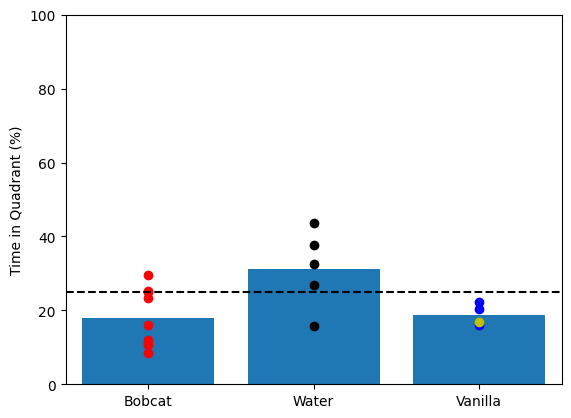

In [54]:
plt.figure()
plt.plot(np.ones((len(bobcat_corner),1)), bobcat_corner, 'ro')
plt.plot(1+np.ones((len(water_corner),1)), water_corner, 'ko')
plt.plot(2+np.ones((len(vanilla_corner), 1)), vanilla_corner, 'bo')
plt.plot(2+np.ones((len(banana_corner), 1)), banana_corner, 'yo')
plt.bar([1,2,3], [np.mean(bobcat_corner), np.mean(water_corner), np.mean(np.hstack((vanilla_corner, banana_corner)))])
plt.axhline(y=25, color='k', linestyle='--')
plt.axis([0.5, 3.5, 0, 100])
plt.ylabel('Time in Quadrant (%)')
plt.xticks([1, 2, 3], labels=['Bobcat', 'Water', 'Vanilla'])
